In [1]:

# Jump-Start Example: Python analysis of MSPA Software Survey

# Update 2017-09-21 by Tom Miller and Kelsey O'Neill
# Update 2018-06-30 by Tom Miller v005 transformation code added

# tested under Python 3.6.1 :: Anaconda custom (x86_64)
# on Windows 10.0 and Mac OS Sierra 10.12.2 

# shows how to read in data from a comma-delimited text file
# manipuate data, create new count variables, define categorical variables,
# work with dictionaries and lambda mapping functions for recoding data 

# visualizations in this program are routed to external pdf files
# so they may be included in printed or electronic reports

# prepare for Python version 3x features and functions
# these two lines of code are needed for Python 2.7 only
# commented out for Python 3.x versions
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls



In [2]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
import os

In [3]:

# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)




In [4]:
# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address


###############################################################################
### Define path to where file is stored.  Note for windows users, maintain the 
### r in front of the path.  For mac users, the r is not required.
###############################################################################
path='/Users/honpro/Desktop/Temp/School/MSDS 422/Week 1/Outputs'
os.chdir(path)





In [5]:
valid_survey_input = pd.read_csv('/Users/honpro/Desktop/Temp/School/MSDS 422/Week 1/mspa-software-survey-case-python-v005/mspa-survey-data.csv')

In [6]:
#Initial inspection of Dataset
type(valid_survey_input)
valid_survey_input.shape
valid_survey_input.ndim
valid_survey_input.head(5)


# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

# examine the structure of the DataFrame object
dfShape_row = valid_survey_input.shape[0]
dfShape_column = valid_survey_input.shape[1]
valid_survey_input.describe()
print("\nContents of initial survey data is {} rows and {} columns".format(dfShape_row,dfShape_column))

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
#print(valid_survey_input.columns)
print('\nVariables for survey are:')
for i, e in enumerate(valid_survey_input.columns, 1):
    print(e)


Contents of initial survey data is 207 rows and 40 columns

Variables for survey are:
Personal_JavaScalaSpark
Personal_JavaScriptHTMLCSS
Personal_Python
Personal_R
Personal_SAS
Professional_JavaScalaSpark
Professional_JavaScriptHTMLCSS
Professional_Python
Professional_R
Professional_SAS
Industry_JavaScalaSpark
Industry_JavaScriptHTMLCSS
Industry_Python
Industry_R
Industry_SAS
Python_Course_Interest
Foundations_DE_Course_Interest
Analytics_App_Course_Interest
Systems_Analysis_Course_Interest
Courses_Completed
PREDICT400
PREDICT401
PREDICT410
PREDICT411
PREDICT413
PREDICT420
PREDICT422
PREDICT450
PREDICT451
PREDICT452
PREDICT453
PREDICT454
PREDICT455
PREDICT456
PREDICT457
OtherPython
OtherR
OtherSAS
Other
Graduate_Date


In [7]:

# shorten the variable/column names variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS',
    'Python_Course_Interest': 'Python',
    'Foundations_DE_Course_Interest': 'Foundations_DE',
    'Analytics_App_Course_Interest': 'Analytics_App',
    "Systems_Analysis_Course_Interest":'Systems_Analysis'})

# Inspecting new df columns
print(survey_df.columns)

    
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']
survey_df.loc


#inspecting for null objects
print('\nSum of null values in each column')
print(survey_df.isna().sum())




Index(['My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS', 'Prof_Java',
       'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS', 'Ind_Java', 'Ind_JS',
       'Ind_Python', 'Ind_R', 'Ind_SAS', 'Python', 'Foundations_DE',
       'Analytics_App', 'Systems_Analysis', 'Courses_Completed', 'PREDICT400',
       'PREDICT401', 'PREDICT410', 'PREDICT411', 'PREDICT413', 'PREDICT420',
       'PREDICT422', 'PREDICT450', 'PREDICT451', 'PREDICT452', 'PREDICT453',
       'PREDICT454', 'PREDICT455', 'PREDICT456', 'PREDICT457', 'OtherPython',
       'OtherR', 'OtherSAS', 'Other', 'Graduate_Date'],
      dtype='object')

Sum of null values in each column
My_Java                0
My_JS                  0
My_Python              0
My_R                   0
My_SAS                 0
Prof_Java              0
Prof_JS                0
Prof_Python            0
Prof_R                 0
Prof_SAS               0
Ind_Java               0
Ind_JS                 0
Ind_Python             0
Ind_R                  0
Ind_SAS  

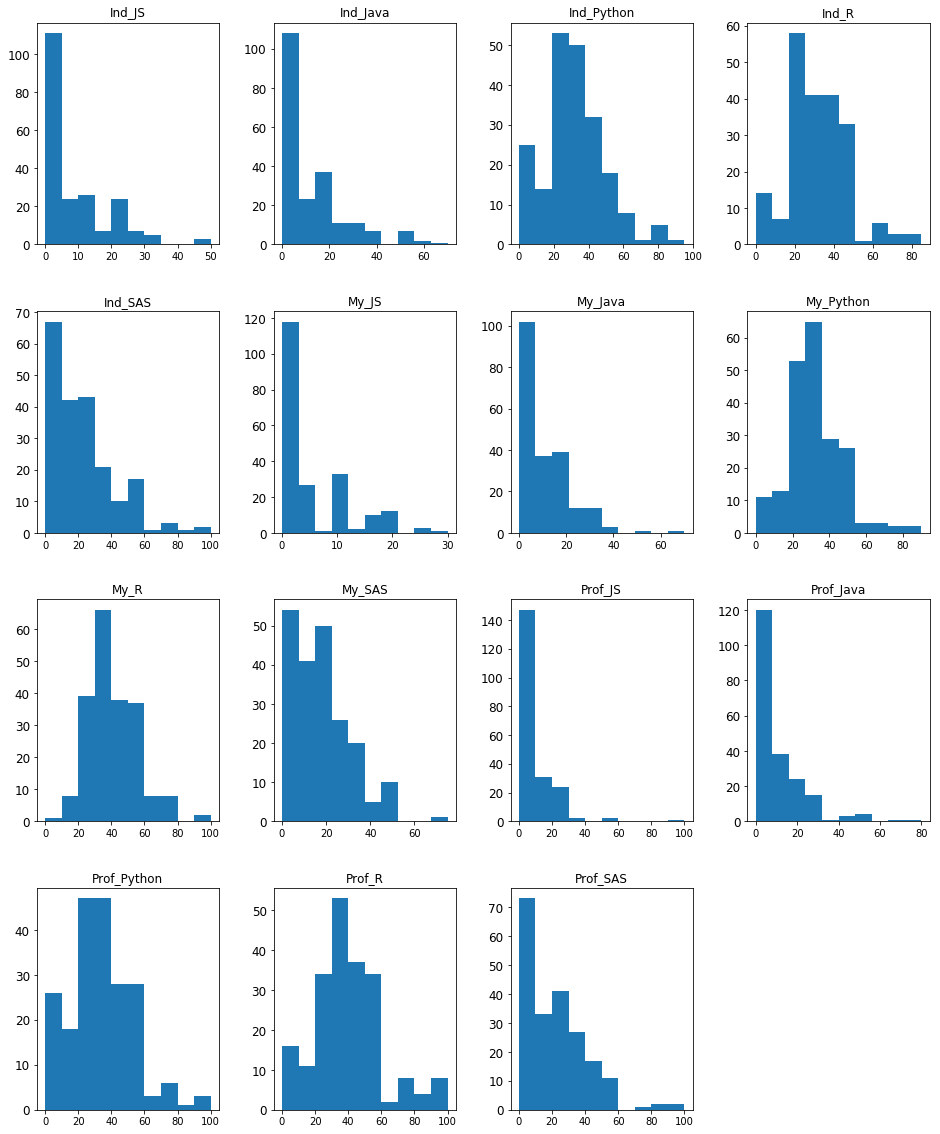

In [8]:
#Overall distribution of all  software
software_df.hist(grid=False, xlabelsize = 10, ylabelsize=12, figsize=(16,20))
plt.xlabel("Point Distribution", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.savefig('overalldistribution.pdf', 
bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
orientation='portrait', papertype=None, format=None, 
transparent=True, pad_inches=0.25, frameon=None) 

#Initial review:  for Java/JS/SAS, there are high frequency of low point counts.  
#For R and Python, high frequency of high point counts



In [9]:
#grouping and analyzing software by 1) Interest Desire(software_desire), 2)Professional Need(software_need), and 3)Industry Importance(software_Industry)
software_desire = survey_df.loc[:,['My_JS', 'My_Java', 'My_SAS', 'My_Python', 'My_R']]
software_need = survey_df.loc[:,['Prof_Java', 'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS']]
software_industry = survey_df.loc[:,['Ind_Java', 'Ind_JS', 'Ind_Python', 'Ind_R', 'Ind_SAS']]

survey_df.columns
#Checking columns
software_desire.columns
software_need.columns
software_industry.columns



Index(['Ind_Java', 'Ind_JS', 'Ind_Python', 'Ind_R', 'Ind_SAS'], dtype='object')

In [10]:
#Converting series to dataframe and sorting by highest Mean for each group.
software_desire_mean = software_desire.mean().to_frame().reset_index()
software_desire_mean.columns = ['software_Desire', 'Mean_Desire']
software_desire_mean = software_desire_mean.sort_values(by = ['Mean_Desire'], ascending = False)
print(software_desire_mean)

software_need_mean = software_need.mean().to_frame().reset_index()
software_need_mean.columns = ['software_need', 'Mean_need']
software_need_mean = software_need_mean.sort_values(by = ['Mean_need'], ascending = False)
print(software_need_mean)

software_industry_mean = software_industry.mean().to_frame().reset_index()
software_industry_mean.columns = ['software_industry', 'mean_industry']
software_industry_mean = software_industry_mean.sort_values(by = ['mean_industry'], ascending = False)
print(software_industry_mean)
###################
#By Mean, R is the most in demand across 3 groupings (personal - professional - industry)
###################




  software_Desire  Mean_Desire
4            My_R    37.125604
3       My_Python    31.304348
2          My_SAS    16.637681
1         My_Java    10.135266
0           My_JS     4.797101
  software_need  Mean_need
3        Prof_R  36.415459
2   Prof_Python  30.028986
4      Prof_SAS  18.463768
0     Prof_Java   9.251208
1       Prof_JS   5.840580
  software_industry  mean_industry
3             Ind_R      32.434783
2        Ind_Python      29.772947
4           Ind_SAS      18.884058
0          Ind_Java      11.942029
1            Ind_JS       6.966184


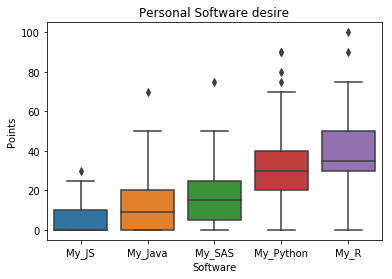

In [11]:
sns.boxplot(data=software_desire)
plt.xlabel("Software")
plt.ylabel("Points")
plt.title("Personal Software desire")
###################
#Personal Desire standpoint, R has the highest average.  Overall, not a lot of variance among all software
###################
plt.savefig('softwareboxplot.pdf', 
bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
orientation='portrait', papertype=None, format=None, 
transparent=True, pad_inches=0.25, frameon=None) 






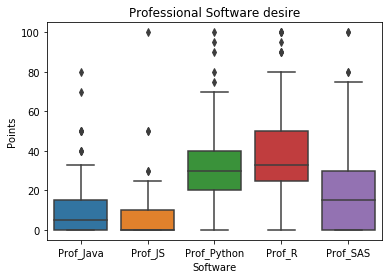

In [12]:
sns.boxplot(data=software_need)
plt.xlabel("Software")
plt.ylabel("Points")
plt.title("Professional Software desire")
plt.savefig('profsoftwarebox.pdf', 
bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
orientation='portrait', papertype=None, format=None, 
transparent=True, pad_inches=0.25, frameon=None) 
####################
#R is still the winner, but in this one, quite a few students are choosing python as seen in the outliers.
####################




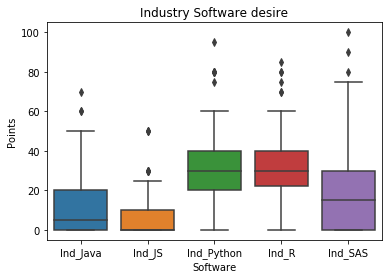

In [13]:
sns.boxplot(data=software_industry)
plt.xlabel("Software")
plt.ylabel("Points")
plt.title("Industry Software desire")
plt.savefig('industrysoftware.pdf', 
bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
orientation='portrait', papertype=None, format=None, 
transparent=True, pad_inches=0.25, frameon=None) 
#####################
#Industry Perspective, R and Python are really close.  There are students voting Python has very much important by the look of the outliers
####################

In [14]:
##############################
#Interest Statistics
#############################
interest_df = survey_df.loc[:,'Python':'Systems_Analysis']

#Mean values of course interest
print(interest_df.mean())
# The highest interest is the Python Course.
#People are interested in the other courses too




Python              73.529126
Foundations_DE      58.045000
Analytics_App       55.201970
Systems_Analysis    53.630000
dtype: float64


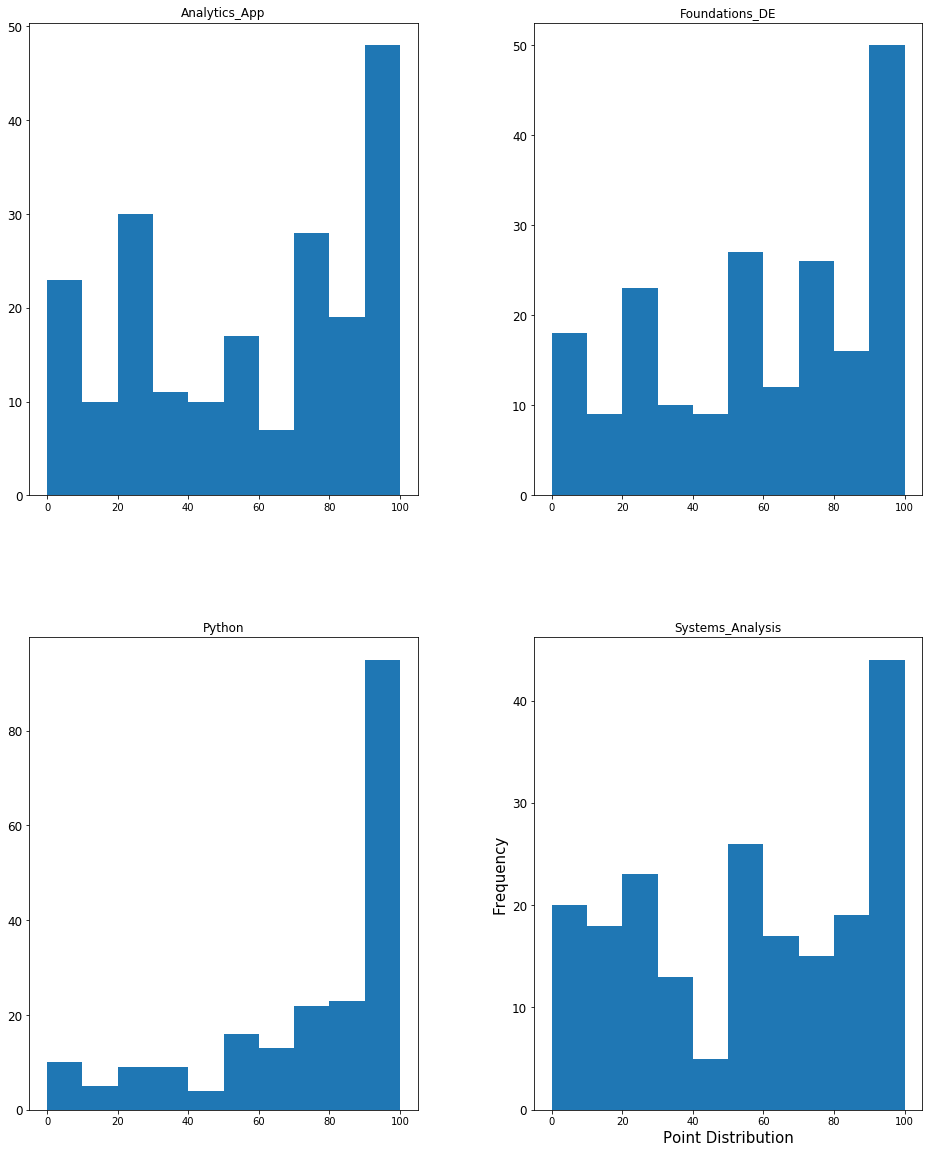

In [15]:
#Plotting by course interest
#interest_df.hist()
interest_df.hist(grid=False, xlabelsize = 10, ylabelsize=12, figsize=(16,20))
plt.xlabel("Point Distribution", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.savefig('courseinterest.pdf', 
bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
orientation='portrait', papertype=None, format=None, 
transparent=True, pad_inches=0.25, frameon=None) 
#Interest is evenly distributed.  Students are interested in all courses






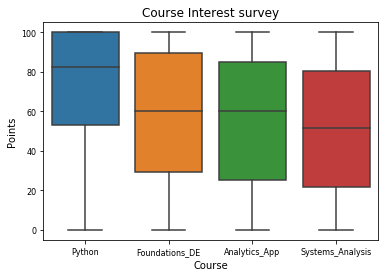

In [16]:
sns.boxplot(data=interest_df).tick_params(labelsize=8)
plt.xlabel("Course")
plt.ylabel("Points")
plt.title("Course Interest survey")
plt.savefig('courseinterest_box.pdf', 
bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
orientation='portrait', papertype=None, format=None, 
transparent=True, pad_inches=0.25, frameon=None) 
##############################
#Assuming the higher the points, the more important,  i,e 100 = very very important, 70= mediocre important,  there are students who rank Python as extremely important.
#############################

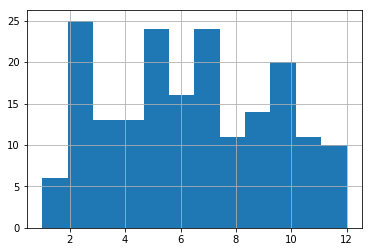

In [17]:
##############################
#CourseCompleted
##############################
courses_completed_df = survey_df.loc[:,'Courses_Completed']
courses_completed_df.head()
courses_completed_df.hist(bins=12)
plt.savefig('coursescompleted.pdf', 
bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
orientation='portrait', papertype=None, format=None, 
transparent=True, pad_inches=0.25, frameon=None) 
#Most students who participated are in the early to mid progress of their studies.

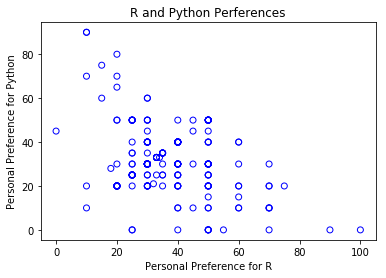

In [18]:
############################
# 2 way interaction
############################
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
#It appears most people give equal importance to python and R. some preferred to give majority of points to either only R or Python, but majority 
#gave similar importance ranking to both software



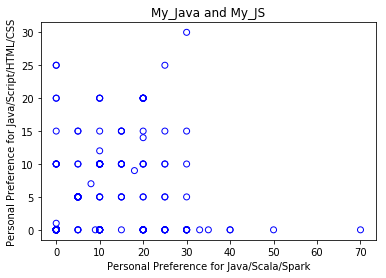

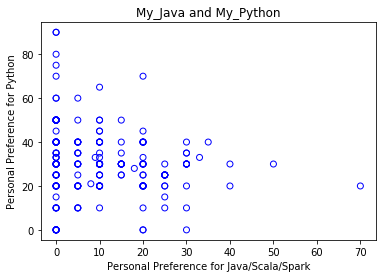

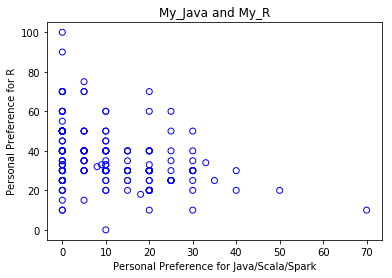

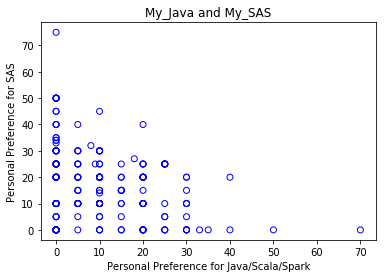

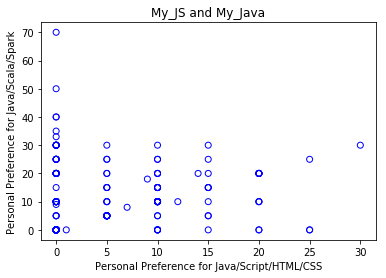

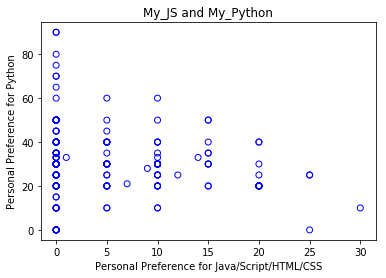

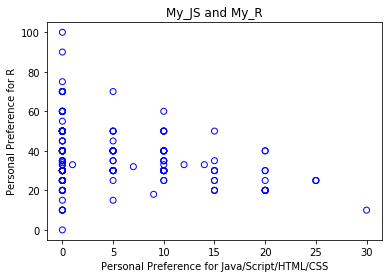

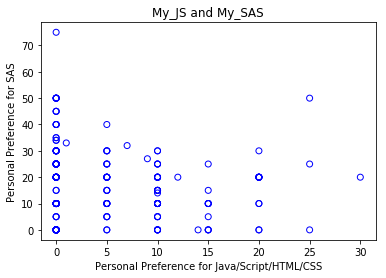

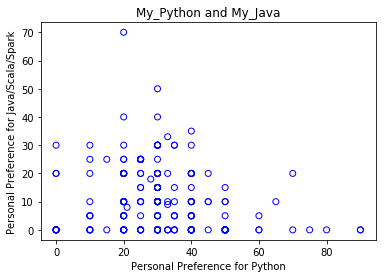

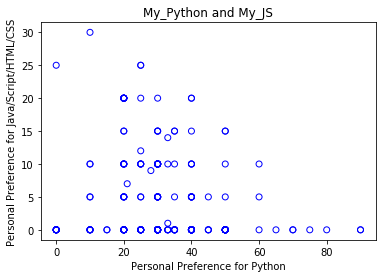

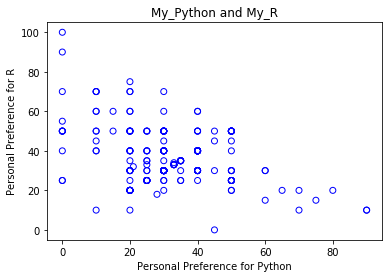

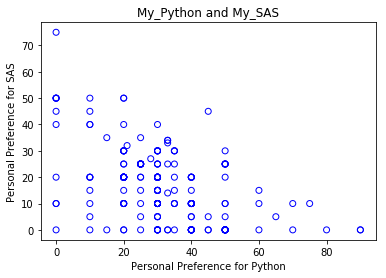

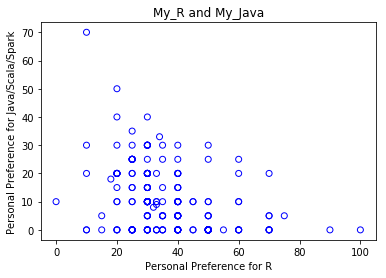

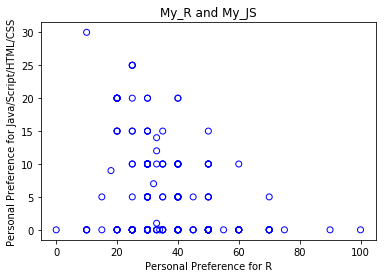

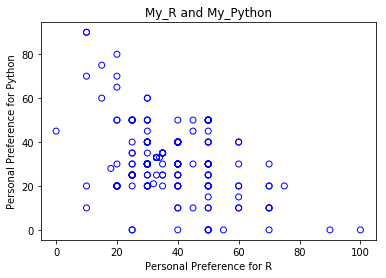

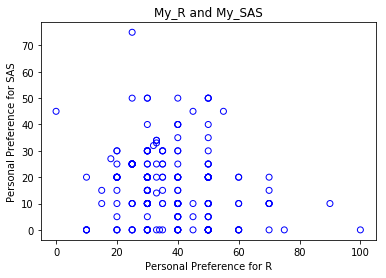

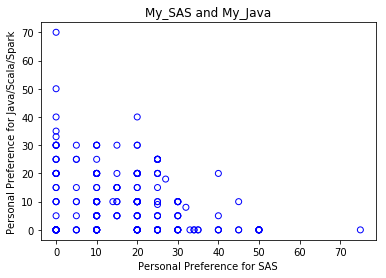

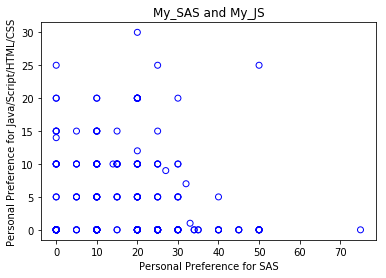

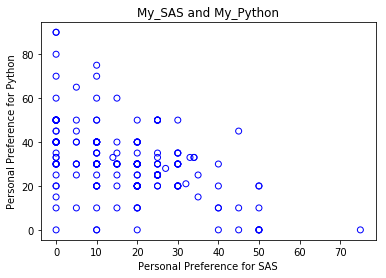

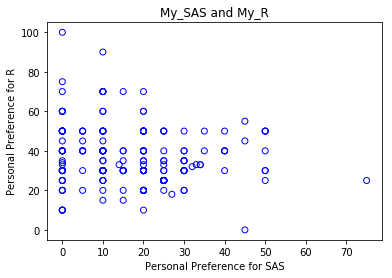

In [19]:
survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]    

# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  





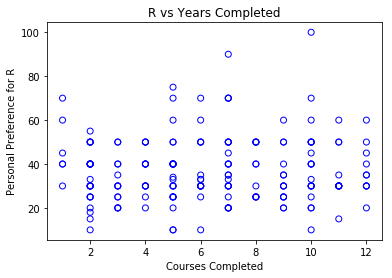

In [20]:

Fig, axis = plt.subplots()
axis.set_xlabel('Courses Completed')
axis.set_ylabel('Personal Preference for R')
plt.title('R vs Years Completed')
scatter_plot = axis.scatter(survey_df['Courses_Completed'], 
    survey_df['My_R'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-courses-completed.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

#All grade levels choose R



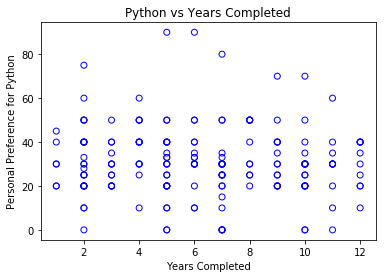

In [21]:
#######
#Interaction between R and courses completed
########
Fig, axis = plt.subplots()
axis.set_xlabel('Years Completed')
axis.set_ylabel('Personal Preference for Python')
plt.title('Python vs Years Completed')
scatter_plot = axis.scatter(survey_df['Courses_Completed'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-courses-completed.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
#All grade levels choose Python



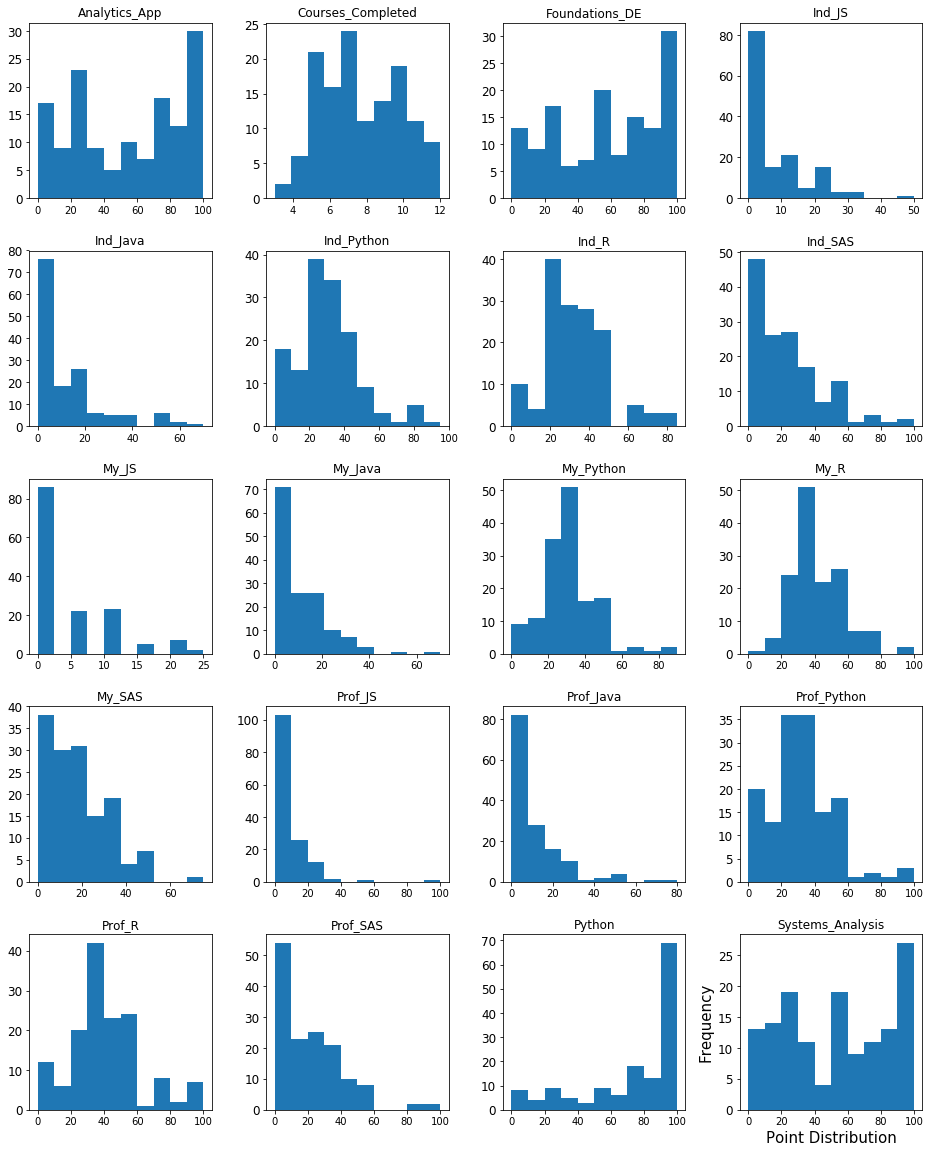

In [22]:
#####
#For the students who took a course with SAS, what do they think?
####
SAS_Students = survey_df.loc[survey_df['PREDICT410']=='PREDICT 410 Regression and Multivariate Analysis (SAS)']
SAS_Students.hist(grid=False, xlabelsize = 10, ylabelsize=12, figsize=(16,20))
plt.xlabel("Point Distribution", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.savefig('histogram_sas.pdf', 
bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
orientation='portrait', papertype=None, format=None, 
transparent=True, pad_inches=0.25, frameon=None) 
#for students who had a SAS class, they still reccomend R and Python and in fact gave SAS a fairly low score




Text(0, 0.5, 'Frequency')

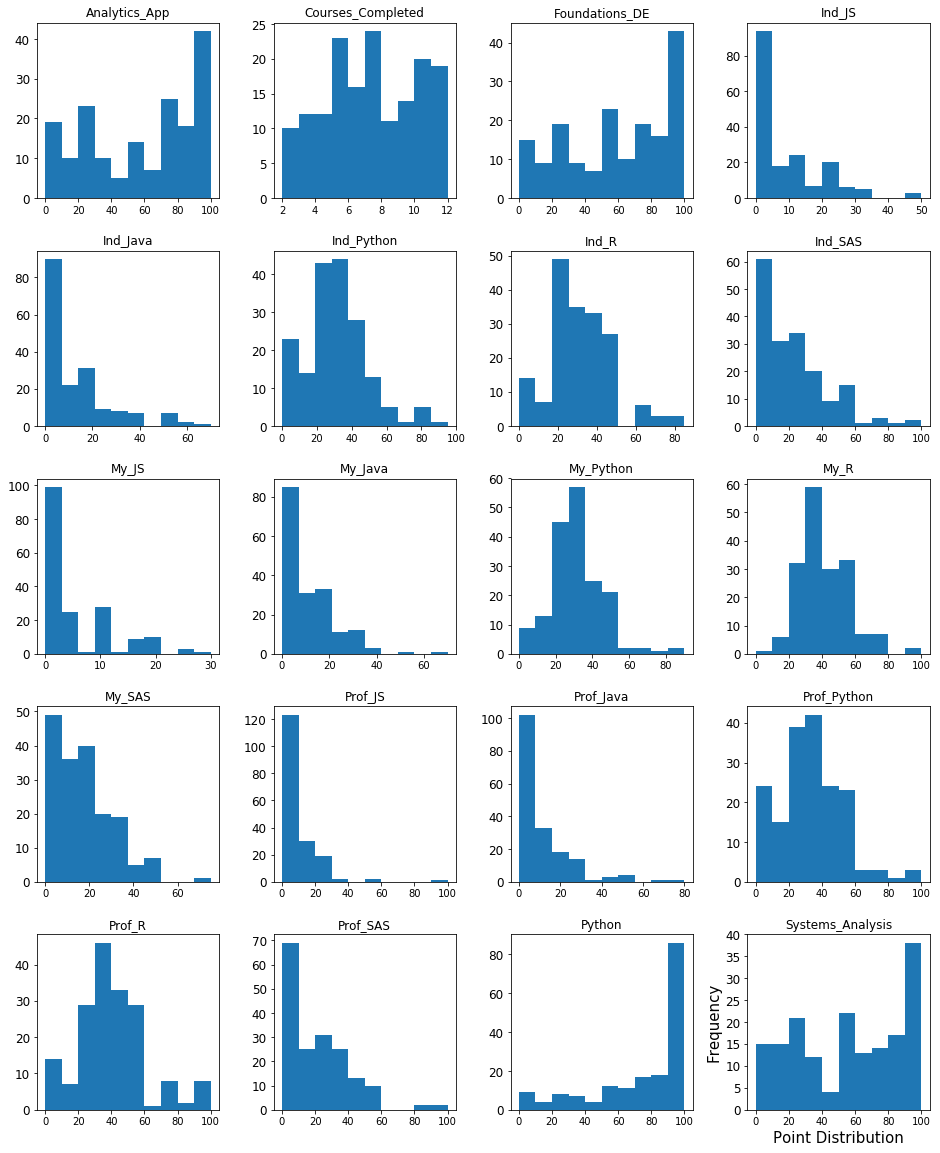

In [23]:
###What do R students think
#For students who took any R course, what do they think

R_Students = survey_df.loc[(survey_df['PREDICT401'] =='PREDICT 401 Introduction to Statistical Analysis (R)') |
                          (survey_df['PREDICT413'] == 'PREDICT 413 Time Series Analysis and Forecasting (R)')|
                            (survey_df['PREDICT422']=='PREDICT 422 Practical Machine Learning (R)') |
                          (survey_df['PREDICT451']=='PREDICT 451 Risk Analytics (R)') | 
                           (survey_df['PREDICT455']=='PREDICT 455 Data Visualization (R)') | 
                            (survey_df['PREDICT456']=='PREDICT 456 Sports Performance Analytics (R)')]


R_Students.hist(grid=False, xlabelsize = 10, ylabelsize=12, figsize=(16,20))
plt.xlabel("Point Distribution", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)

#Students who took R prefered taking R or Python over SAS


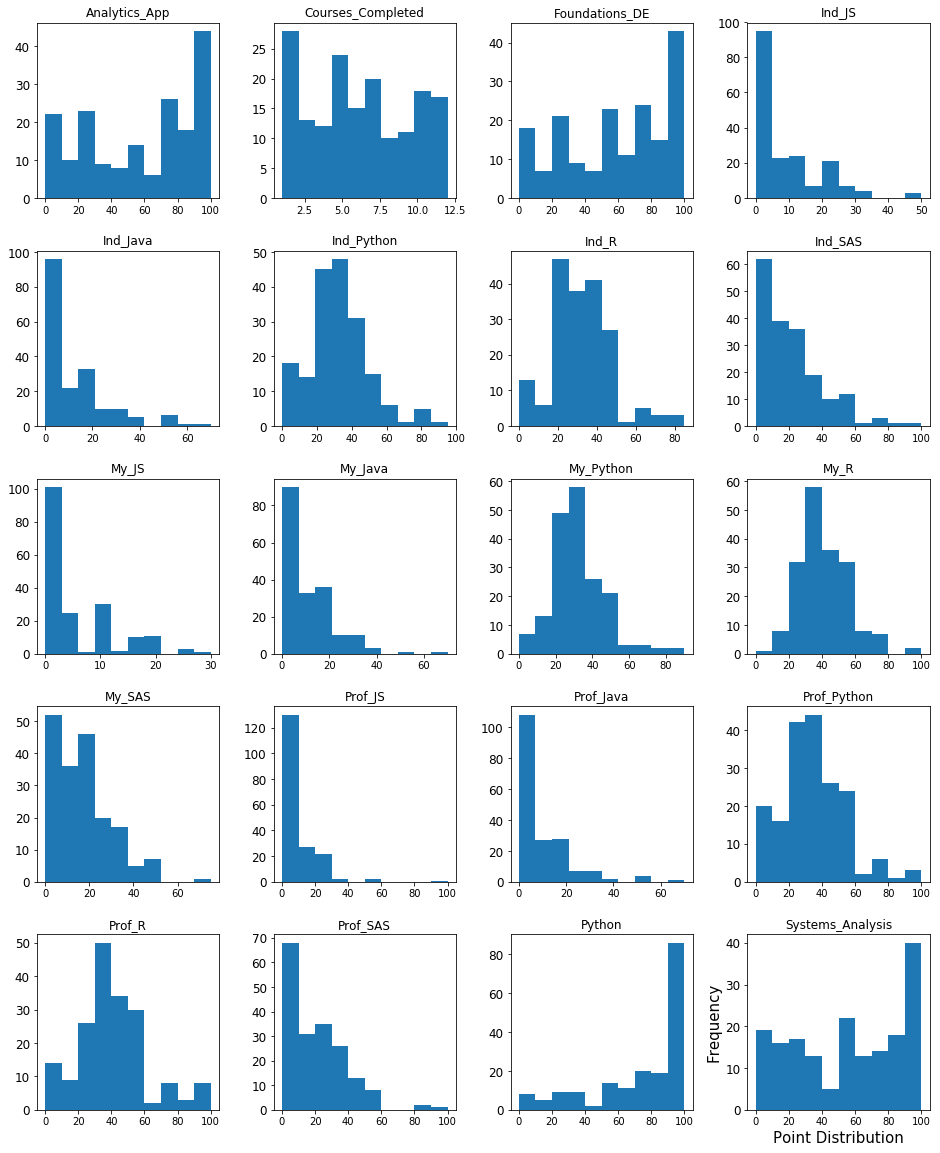

In [24]:
###What do Python students think
#For students who took any Python course, what do they think

Python_students = survey_df.loc[(survey_df['PREDICT400'] =='PREDICT 400 Math for Modelers (Python)') |
                          (survey_df['PREDICT420'] == 'PREDICT420')|
                            (survey_df['PREDICT422']=='PREDICT 422 Practical Machine Learning (R)') |
                          (survey_df['PREDICT452']=='PREDICT 452 Web Analytics and Network Data Science (Python)') | 
                           (survey_df['PREDICT453']=='PREDICT 453 Text Analytics (Python)')]
                            


Python_students.hist(grid=False, xlabelsize = 10, ylabelsize=12, figsize=(16,20))
plt.xlabel("Point Distribution", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.savefig('R_histogram.pdf', 
bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
orientation='portrait', papertype=None, format=None, 
transparent=True, pad_inches=0.25, frameon=None) 

#Students who took Python prefered taking R or Python over SAS

<Figure size 432x288 with 0 Axes>

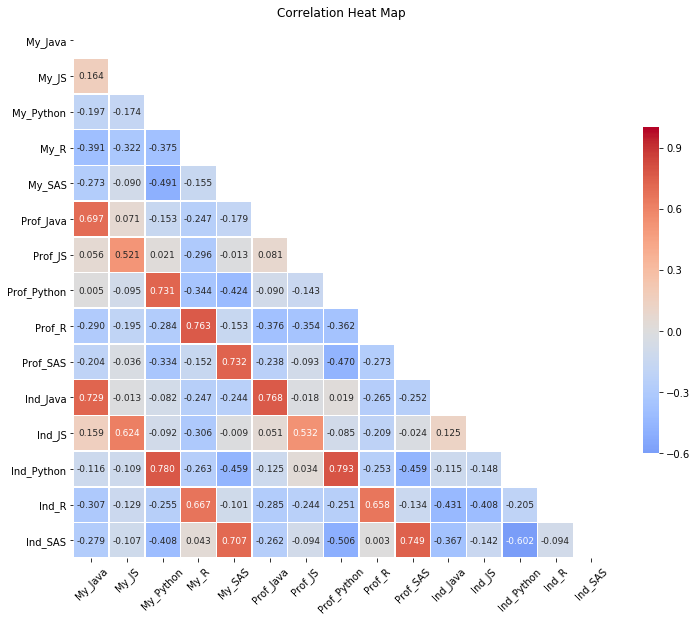

In [25]:


# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 


<Figure size 432x288 with 0 Axes>

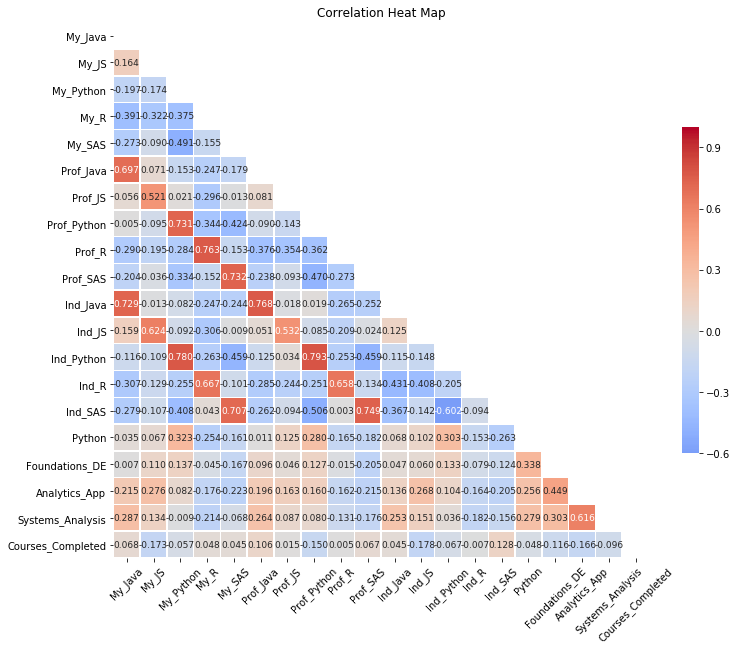

In [26]:
#correlation between all variables
corr_chart(df_corr = survey_df) 



In [27]:
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())

# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())




Descriptive statistics for survey data ---------------
          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.415459   18.463768   11.942029   
std 

In [28]:
# ----------------------------------------------------------
# transformation code added with version v005
# ----------------------------------------------------------
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['My_Python'].dropna().astype(float)
X = X[X>0]
print(X.shape)
print(X)


(196,)
RespondentID
5133300037    50.0
5132253300    40.0
5132096630    25.0
5131860849    30.0
5131698528    40.0
5130809490    40.0
5130188921    20.0
5129721525    50.0
5129569679    35.0
5129476874    20.0
5128886013    25.0
5128804584    30.0
5128370809    40.0
5128110446    10.0
5128109564    40.0
5128088922    15.0
5127941642    35.0
5127921328    30.0
5127886128    25.0
5127002953    20.0
5126564196    40.0
5126541968    30.0
5126536045    25.0
5126530686    20.0
5126502407    45.0
5126413256    30.0
5126401782    25.0
5126215650    20.0
5126206084    30.0
5126090565    25.0
              ... 
5112199649    20.0
5111622734    33.0
5111504015    28.0
5111503402    10.0
5111454402    20.0
5111168215    40.0
5111156678    20.0
5111062517    30.0
5110957277    30.0
5110915842    50.0
5110712343    50.0
5110418963    40.0
5110352401    33.0
5110327343    50.0
5110303458    40.0
5110270448    40.0
5110255813    25.0
5110241032    40.0
5110217530    50.0
5110139306    30.0
5110022069 

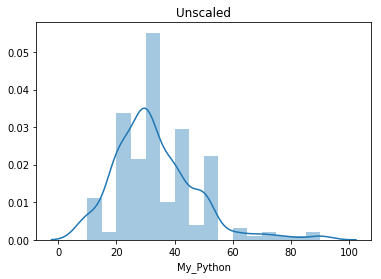

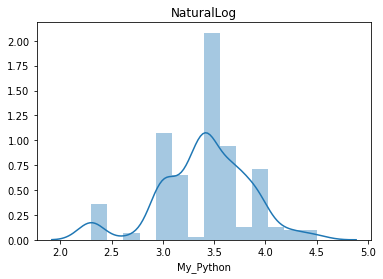

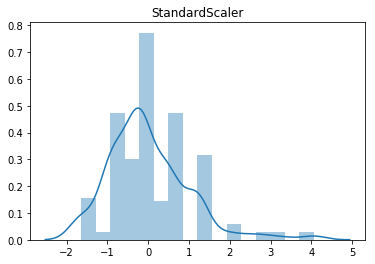

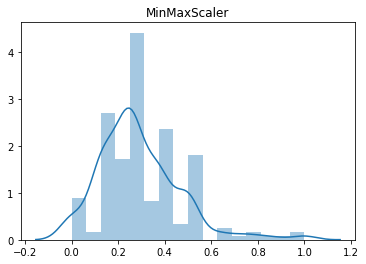

In [29]:
# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  


log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  


X=np.array(X).reshape(-1,1)
standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X)).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X)).set_title('MinMaxScaler')
#sns.distplot(MinMaxScaler().fit_transform(X)).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
 


